In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Programming Exercise 6 - Support Vector Machines

In [0]:
# import os
# from pathlib import Path
# path = Path(os.getcwd())
# import sys
# sys.path.append('/content/drive/My Drive/Colab Notebooks/ML - Coursera/Codes')
# import utils
# print(sys.path)

In [0]:
# %load ../../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt



# # Import regular expressions to process emails
# import re
# # Optimization module in scipy
# from scipy import optimize
# # library written for this exercise providing additional functions for assignment submission, and others
# # define the submission/grader object for this exercise
# grader = utils.Grader()


from scipy.io import loadmat
from sklearn.svm import SVC

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [0]:
def plotData(X, y):
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    
    plt.scatter(X[pos,0], X[pos,1], s=60, c='k', marker='+', linewidths=1)
    plt.scatter(X[neg,0], X[neg,1], s=60, c='y', marker='o', linewidths=1)

In [0]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plotData(X, y)
    #plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='.', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

### Support Vector Machines

#### Example Dataset 1

In [0]:
import os
from pathlib import Path
path = Path(os.getcwd())

data1 = loadmat(path/'drive'/'My Drive'/'Colab Notebooks'/'ML - Coursera'/'Datasets'/'ex6data1.mat')

In [6]:
# data1 = loadmat('data/ex6data1.mat')
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [7]:
y1 = data1['y']
X1 = data1['X']

print('X1:', X1.shape)
print('y1:', y1.shape)

X1: (51, 2)
y1: (51, 1)


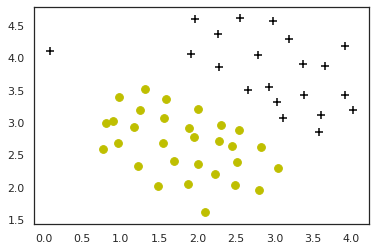

In [8]:
plotData(X1,y1)

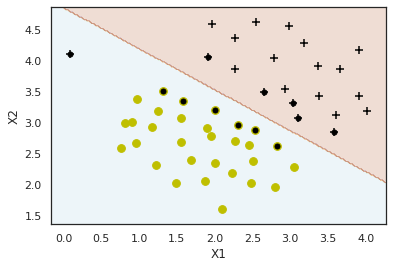

Number of support vectors:  12


In [9]:
clf = SVC(C=1.0, kernel='linear')
clf.fit(X1, y1.ravel())
plot_svc(clf, X1, y1)

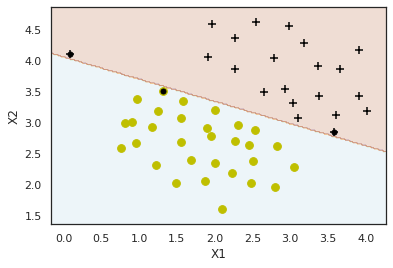

Number of support vectors:  3


In [10]:
clf.set_params(C=100)
clf.fit(X1, y1.ravel())
plot_svc(clf, X1, y1)

### SVM with Gaussian Kernels

In [0]:
def gaussianKernel(x1, x2, sigma=2):
    norm = (x1-x2).T.dot(x1-x2)
    return(np.exp(-norm/(2*sigma**2)))

In [12]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

gaussianKernel(x1, x2, sigma)

0.32465246735834974

#### Example Dataset 2

In [13]:
# data2 = loadmat('data/ex6data2.mat')
data2 = loadmat(path/'drive'/'My Drive'/'Colab Notebooks'/'ML - Coursera'/'Datasets'/'ex6data2.mat')
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [14]:
y2 = data2['y']
X2 = data2['X']

print('X2:', X2.shape)
print('y2:', y2.shape)

X2: (863, 2)
y2: (863, 1)


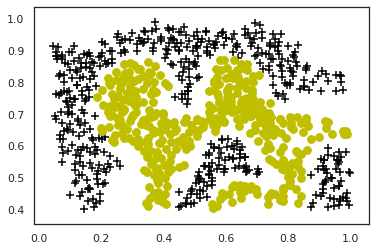

In [15]:
plotData(X2, y2)

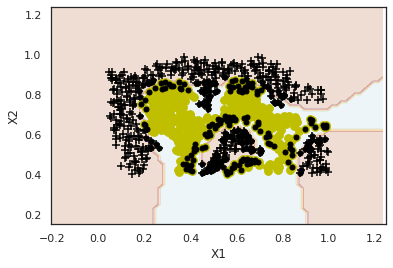

Number of support vectors:  254


In [16]:
clf2 = SVC(C=50, kernel='rbf', gamma=6)
clf2.fit(X2, y2.ravel())
plot_svc(clf2, X2, y2)

#### Example Dataset 3

In [17]:
# data3 = loadmat('data/ex6data3.mat')
data3 = loadmat(path/'drive'/'My Drive'/'Colab Notebooks'/'ML - Coursera'/'Datasets'/'ex6data3.mat')
data3.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

In [18]:
y3 = data3['y']
X3 = data3['X']

print('X3:', X3.shape)
print('y3:', y3.shape)

X3: (211, 2)
y3: (211, 1)


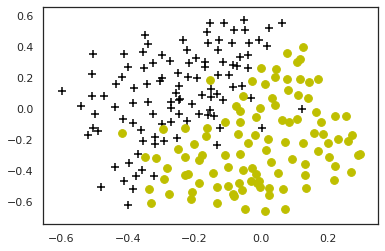

In [19]:
plotData(X3, y3)

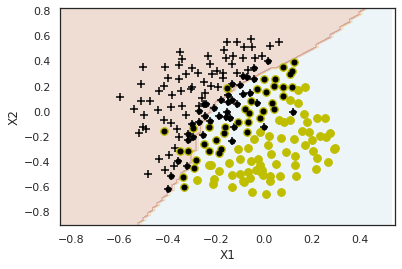

Number of support vectors:  78


In [20]:
clf3 = SVC(C=1.0, kernel='poly', degree=3, gamma=10)
clf3.fit(X3, y3.ravel())
plot_svc(clf3, X3, y3)

### Spam classification

In [21]:
# data4 = pd.read_table('data/vocab.txt', header=None)
data4 = pd.read_table(path/'drive'/'My Drive'/'Colab Notebooks'/'ML - Coursera'/'Datasets'/'vocab.txt',header=None)
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 2 columns):
0    1899 non-null int64
1    1898 non-null object
dtypes: int64(1), object(1)
memory usage: 29.8+ KB


In [22]:
data4.head()

   0      1
0  1     aa
1  2     ab
2  3   abil
3  4    abl
4  5  about

In [23]:
data4[0].head()

0    1
1    2
2    3
3    4
4    5
Name: 0, dtype: int64

#### 2.3 Training SVM for Spam Classification

In [24]:
spam_train = loadmat(path/'drive'/'My Drive'/'Colab Notebooks'/'ML - Coursera'/'Datasets'/'spamTrain.mat')
spam_train.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [25]:
spam_test = loadmat(path/'drive'/'My Drive'/'Colab Notebooks'/'ML - Coursera'/'Datasets'/'spamTest.mat')
spam_test.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Xtest', 'ytest'])

In [26]:
c=0.1
clf_spam = SVC(kernel='linear',C=c,decision_function_shape='ovr')
clf_spam.fit(spam_train['X'],spam_train['y'].ravel())
train_acc = clf_spam.score(spam_train['X'], spam_train['y'].ravel())
test_acc = clf_spam.score(spam_test['Xtest'], spam_test['ytest'].ravel())
print(f'Training accuracy = {train_acc * 100}')
print(f'Test accuracy = {test_acc * 100}')

Training accuracy = 99.825
Test accuracy = 98.9


#### 2.4 Top Predictors for Spam

In [27]:
from sklearn.feature_extraction import DictVectorizer
w = clf_spam.coef_
top10 = np.argsort(w)[-10:]
print(top10)

[[1560 1665 1764 ... 1397  297 1190]]
